Due to the failure of the last comedy special from SussexBudgetProductions at the box office, we have been tasked with finding the root cause of this issue. 

This is an analysis on the IMDB movie data which obtain insights on how the next set of funds can be properly invested. This report explores previous data using the IMDB dataset and also recommends actionable plans.

The dataset provided contains metrics relating to each movie such as : 

Color, director_name, Number of reviews, Duration, director's facebook likes,actor's facebook likes, actor's name, actor facebook likes, gross, genres, movie title,number of voted users, cast's total facebook likes,facenumber in poster,keywords in the plot,imdb link of the movie, Number of user reviews, language, country, content rating, budget, year movie was released. imdb score,the aspect ratio, movie facebook likes.

The dataset was wrangled and modified to include indicators with which we can project fututre sales: 

- Metrics retained include the director's name, genres, country ,movie title, names of the top three actors in the movie, year of the movie, content_rating, imdb_score, movie_facebook_likes, budget, gross, number of critic reviews, duration, language of the movie. The key metric being analysed is the gross sales,and the relationships with other metrics. 

- Metrics such as the aspect ratio of a movie,keywords plot are discarded as they are deemed to have minimal relationship to gross sales. 

- Duration of the movie is also not considered as we are ignoring the role the attention span of a viewer plays on the sales. 

- We also discard facebook likes, as the number of critic reviews is a more encompassing metric and less prone to manipulation.

To begin, I will split the dataset into two. One as an experimental dataset where we explore relationships between the metrics listed above, while the other as a test dataset to confirm our hypothesis. Confirming/rejecting our hypothesis will help make reasonable and actionable recommendations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

In [2]:
movie_data = "movie_metadata.csv"

movie_data_df = pd.read_csv(movie_data)
movie_data_df = movie_data_df.sample(frac =1.0, random_state= 32) #shuffles dataset
midpoint = len(movie_data_df)//2

#Splitting dataset, one for Exploratory data analysis, one to test hypothesis
dev_list = movie_data_df[:midpoint]   #For Exploratory data analysis.
test_list = movie_data_df[midpoint:]   #To confirm our hypothesis 

dev_list

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1427,Color,Nicholas Stoller,177.0,92.0,89.0,190.0,Ike Barinholtz,17000.0,55291815.0,Comedy,...,111.0,English,USA,R,35000000.0,2016.0,329.0,6.0,2.35,0
842,Color,Andy Tennant,171.0,118.0,72.0,681.0,Michael Rapaport,10000.0,177575142.0,Comedy|Romance,...,372.0,English,USA,PG-13,70000000.0,2005.0,975.0,6.6,2.35,0
3867,Color,Milos Forman,149.0,133.0,869.0,425.0,Michael Berryman,888.0,112000000.0,Drama,...,760.0,English,USA,R,4400000.0,1975.0,721.0,8.7,1.85,32000
4443,Color,David Winning,4.0,82.0,65.0,146.0,Amber Marshall,341.0,NaN,Sci-Fi,...,10.0,English,Canada,NaN,1500000.0,2014.0,265.0,2.8,NaN,236
772,Color,Clint Eastwood,306.0,134.0,16000.0,204.0,Morgan Freeman,13000.0,37479778.0,Biography|Drama|History|Sport,...,259.0,English,USA,PG-13,60000000.0,2009.0,11000.0,7.4,2.35,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,Color,Efram Potelle,29.0,79.0,2.0,551.0,Elden Henson,855.0,279282.0,Comedy|Drama|Romance,...,49.0,English,USA,PG-13,1000000.0,2003.0,577.0,6.1,1.85,150
2053,Color,David Zucker,43.0,85.0,119.0,144.0,Priscilla Presley,3000.0,86930411.0,Comedy|Crime,...,87.0,English,USA,PG-13,23000000.0,1991.0,348.0,6.8,1.85,0
1163,Color,Barbra Streisand,27.0,122.0,0.0,292.0,Austin Pendleton,12000.0,41252428.0,Comedy|Drama|Romance,...,71.0,English,USA,PG-13,42000000.0,1996.0,592.0,6.5,1.85,0
1860,Color,Michael Cohn,22.0,100.0,2.0,512.0,Chris Bauer,642.0,NaN,Fantasy|Horror,...,69.0,English,USA,R,26000000.0,1997.0,638.0,6.3,1.85,0


In [3]:
#Selecting Columns of interest 

modified_dev_list = dev_list[['director_name', 'genres','country','movie_title', 'actor_2_name','title_year', 'actor_3_name', 'content_rating','imdb_score', 'movie_facebook_likes','budget', 'gross','num_critic_for_reviews', 'duration', 'language']]
modified_dev_list.sort_values( by = 'gross', ascending= True)

modified_dev_list

,director_name,genres,country,movie_title,actor_2_name,title_year,actor_3_name,content_rating,imdb_score,movie_facebook_likes,budget,gross,num_critic_for_reviews,duration,language
1427,Nicholas Stoller,Comedy,USA,Neighbors 2: Sorority Rising,Ike Barinholtz,2016.0,Kiersey Clemons,R,6.0,0,35000000.0,55291815.0,177.0,92.0,English
842,Andy Tennant,Comedy|Romance,USA,Hitch,Michael Rapaport,2005.0,Kevin Sussman,PG-13,6.6,0,70000000.0,177575142.0,171.0,118.0,English
3867,Milos Forman,Drama,USA,One Flew Over the Cuckoo's Nest,Michael Berryman,1975.0,Louise Fletcher,R,8.7,32000,4400000.0,112000000.0,149.0,133.0,English
4443,David Winning,Sci-Fi,Canada,Mutant World,Amber Marshall,2014.0,John DeSantis,NaN,2.8,236,1500000.0,NaN,4.0,82.0,English
772,Clint Eastwood,Biography|Drama|History|Sport,USA,Invictus,Morgan Freeman,2009.0,Leleti Khumalo,PG-13,7.4,23000,60000000.0,37479778.0,306.0,134.0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,Efram Potelle,Comedy|Drama|Romance,USA,The Battle of Shaker Heights,Elden Henson,2003.0,Kathleen Quinlan,PG-13,6.1,150,1000000.0,279282.0,29.0,79.0,English
2053,David Zucker,Comedy|Crime,USA,The Naked Gun 2½: The Smell of Fear,Priscilla Presley,1991.0,O.J. Simpson,PG-13,6.8,0,23000000.0,86930411.0,43.0,85.0,English
1163,Barbra Streisand,Comedy|Drama|Romance,USA,The Mirror Has Two Faces,Austin Pendleton,1996.0,Mimi Rogers,PG-13,6.5,0,42000000.0,41252428.0,27.0,122.0,English
1860,Michael Cohn,Fantasy|Horror,USA,Snow White: A Tale of Terror,Chris Bauer,1997.0,Monica Keena,R,6.3,0,26000000.0,NaN,22.0,100.0,English


EXAMINATION OF GROSS SALES : 

The gross sales is the key metric with which performance of the next movie will be judged. The examination of previous sales of movies will assist in making a projected outcome.

Text(0.5, 1.0, 'Box plot of gross sales')

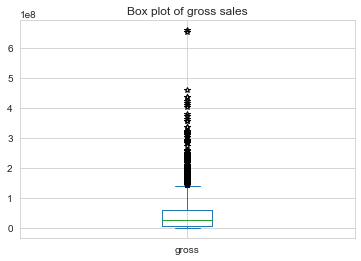

In [4]:
modified_dev_list['gross'].plot(kind = 'box', sym = '*', whis = 1.5)
plt.title("Box plot of gross sales")

From the above chart,  it can be seen above, the chart of the gross plot is extremely positively skewed with a lot of outliers. This means the gross sales of movie datasets is not normally distributed and using central tendency measures such as mean,mode and median to obtain a threshold may be misleading.

Gross sales vs Content rating 

Text(0.5, 1.0, 'Gross sales vs Content_rating')

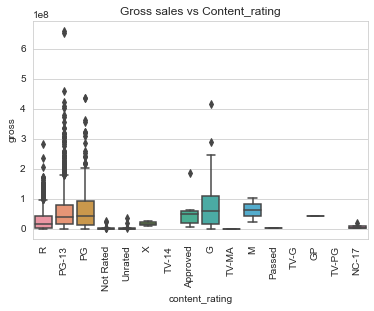

In [5]:

#Checking the relationship between the content rating and gross 
ax1 = sns.boxplot(y = modified_dev_list['gross'].dropna(), x = modified_dev_list['content_rating'].dropna(),)
plt.xticks(rotation = 90 )
plt.title("Gross sales vs Content_rating")

Above is a box-plot of the gross against the content_rating. This chart helps visualise the statistical details of each content rating group against the gross. ( Outliers are shown with the symbol *.)

It can be seen that :
- gross sales beating projection, with a lot of outlier values is a prevalent thing in the 'R', 'PG-13', and 'PG' group.
- the 'G' content rating category that the mean of gross sales surpasses other categories, although with less outliers.
- there are no outliers in the "Approved" category and skewed boxplot



Movie count vs content type

Text(0.5, 1.0, 'Number of movies in each rating')

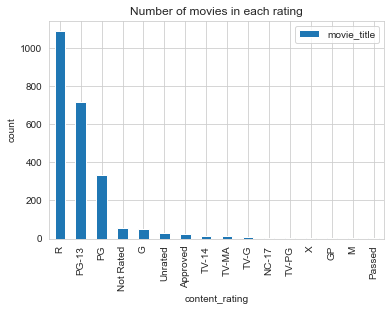

In [6]:
#Checking the amount of movies in the content_rating categories
content_rating_df = modified_dev_list[['movie_title','content_rating']].dropna()
count_content_rating_df = content_rating_df.groupby('content_rating').count().sort_values(by = 'movie_title', ascending = False)
count_content_rating_df.plot(kind = 'bar')
plt.ylabel('count')
plt.title('Number of movies in each rating')

The above is also a chart showing the the count of movies in each content rating category. It can be seen that the categories "R","PG-13","PG" have a higher count of movies. This possibly explains the reason for high number outliers. 

A point worthy of note is the low count of movies in the "G" category and the high average gross sale within this category. This suggests that an average movie in the "G" category makes a certain number of sales. This option is a safe,low-risk option that will be further explored

GROSS SALES VS COUNTRY OF PRODUCTION

Text(0.5, 1.0, 'gross sales vs country')

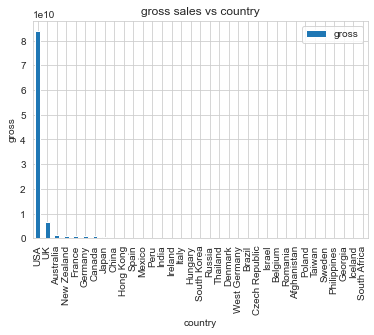

In [7]:
#Checking the amount of movies in the content_rating categories
gross_df = modified_dev_list[['country','gross']].dropna()
gross_df = gross_df.groupby('country').sum().sort_values(by = 'gross', ascending = False)
gross_df.plot(kind = 'bar')
plt.ylabel('gross')
plt.title("gross sales vs country")

Above is a chart that shows the gross sales, by country of production. It shows that majority of the movies are produced in the United States of America, followed by United Kingdom. It does not provide more information on which countries are responsible for the gross sale of this products

Budget Breakdown

In [8]:
modified_dev_list['budget'].describe()

count    2.276000e+03
mean     4.222588e+07
std      2.688178e+08
min      1.400000e+03
25%      6.000000e+06
50%      1.946500e+07
75%      4.300000e+07
max      1.221550e+10
Name: budget, dtype: float64

Above is a breakdown of the budget statistics. It shows a maximum budget of around 12 billion, a minimum of 218 and a mean of 44 million. Further exploration is performed(scatterplot shown below) to examine the relationship between gross sales and budget

Text(0.5, 1.0, 'Gross vs Budget')

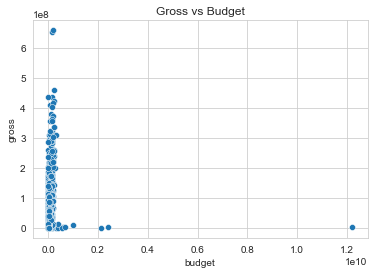

In [9]:
#Check relationship between gross and budget of movies
ax1 = sns.scatterplot(x = modified_dev_list['budget'], y = modified_dev_list['gross'])
plt.title("Gross vs Budget")

The chart above shows the relationship between the budget and gross sales of a movie. 

From this chart, it can be seen that there exists no correlation between the budget of a movie and the gross sale of the movie. 

This is a current hypothesis.

To verify our hypothesis about the correlation between the budget of a movie and the gross value of sales, we perform a correlation test  on the test data using the pearson's and spearman's correlation test. Using a significance level of 5%, corresponding to a p-value of 0.05 as a standard. The p-value/significance level is the percentage that the occurence in your sample is by chance, thus a significance level of 5% shows that 5% of the happenings in our sample is by chance.

Null Hypothesis,H0 : There is no correlation between the gross sales and budget.

If p_value(test data) is less than 0.05. We fail to reject the null hypothesis. there's no correlation between the gross sales of a movie and the budget.

Alternative Hypothesis, H1 :If p_value(test data) is greater than 0.05 We reject our null hypothesis, thus accepting there's a correlation between the gross sales of a movie and the budget.

VERIFYING HYPOTHESIS ON TEST DATA

In [10]:
import scipy.stats
test_list_df = pd.DataFrame(test_list)

new_test_list_df = test_list_df.sort_values(by= 'gross', ascending= False).dropna()


pearson_corr, pearson_p_value = scipy.stats.pearsonr(new_test_list_df['gross'], new_test_list_df['budget'])
spearman_corr, spearman_p_value = scipy.stats.spearmanr(new_test_list_df['gross'], new_test_list_df['budget'])

print(f"The pearson correlation coefficient between the gross and budget is {pearson_corr} while the p_value is {pearson_p_value}")
print(f"The spearman correlation coefficient between the gross and budget is {spearman_corr} while the p_value is {spearman_p_value}")

The pearson correlation coefficient between the gross and budget is 0.208346380356098 while the p_value is 4.763037239767701e-20
The spearman correlation coefficient between the gross and budget is 0.6504984165443066 while the p_value is 1.1426322055565285e-228


From the scientific calculations above, it can be seen that the p_value of both the pearson and spearman's test are both less than 0.05

Thus we accept our null hypothesis, and conclude that there is no significant relationship between the gross sales of a movie and the budget.

In [11]:
import numpy as np
#Using the top 75 percentile of the dev_test to determine characteristics of our next movie,  by examining the top 75, we can assess the predominant features

imdb_score = modified_dev_list['imdb_score']
gross = modified_dev_list['gross'].dropna()

imdb_75 = np.percentile(list(imdb_score), 75)
gross_75 = np.percentile(list(gross), 75)
gross_25 = np.percentile(list(gross), 25)

summary_statistics = list(gross.describe())

#Format output to be easily readable
print (f"Here are the statistics of the gross sales in the development dataset :  \nCount is {summary_statistics[0]}, \nMean is {summary_statistics[1]}, \nstandard_deviation value is {summary_statistics[2]}, \nMinimum is {summary_statistics[3]}, \n25th percentile is {summary_statistics[4]}, \n50th percentile is {summary_statistics[5]}, and \n75th percentile is {summary_statistics[6]}, \nMaximum value is {summary_statistics[7]}")

Here are the statistics of the gross sales in the development dataset :  
Count is 2061.0, 
Mean is 47022531.91508976, 
standard_deviation value is 64899281.77086928, 
Minimum is 1111.0, 
25th percentile is 5773519.0, 
50th percentile is 26003149.0, and 
75th percentile is 60054449.0, 
Maximum value is 658672302.0


In the same way, we make a statistical analysis of the gross, to know the average gross sales per movie, the 25th percentile, the 75th percentile. This will enable us make a reasonable projection for our next movie at SussexBudgetProductions. 

Relationships between gross sales and Underlying factors can be seen below. 

<AxesSubplot:xlabel='title_year'>

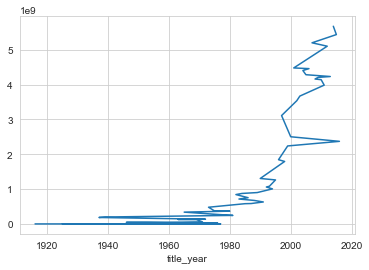

In [12]:
#Trend line to show gross over the years
modified_dev_list.groupby('title_year')['gross'].sum().sort_values(ascending = False).plot(kind = 'line')

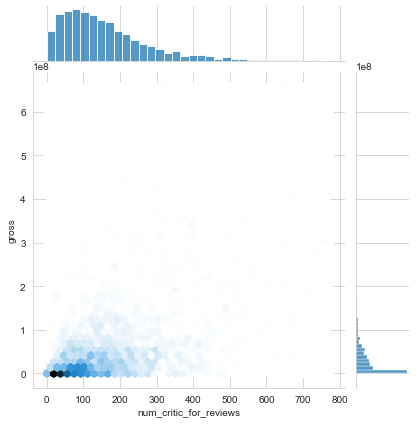

In [13]:
#Check relationship between gross and number of critic reviews
ax1 = sns.jointplot(x = modified_dev_list['num_critic_for_reviews'], y = modified_dev_list['gross'], kind = "hex")

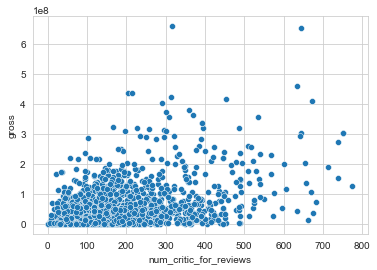

In [14]:
#Check relationship between gross and number of critic reviews
ax1 = sns.scatterplot(x = modified_dev_list['num_critic_for_reviews'], y = modified_dev_list['gross'])

1st chart above shows the relationship between the title_year and gross sales. It can be seen to group exponential over a period of 20 years up until 2000, where it has staggered back and forth. This can be attributed to less friction between the viewer and TV show with the advent of online streams and other experience shaping platforms.

2nd chart above is a scatterplot which shows the distribution of the number of critic reviews with gross sales. It shows a pattern that movies with high gross sales are likely to have high number of critic reviews.

Imdb score vs gross sales 

Text(0, 0.5, 'gross_sales')

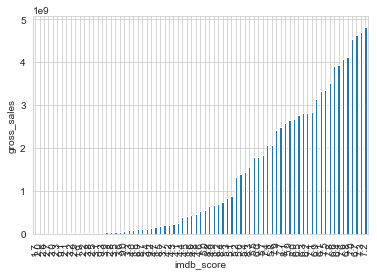

In [15]:
modified_dev_list.groupby('imdb_score')['gross'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.ylabel("gross_sales")

We can see from the above plot that the gross sale of a movie increases with the IMDB SCORE. This is good, as it's a reasonable metric to base our projections on We investigate this further to validate our hypothesis before progressing.

Similar to the correlation test, we check the test data for correlations.

Null Hypothesis,H0 : There is no relationship between the imdb_score and gross sales of a movie 

If p_value(test data) is less than 0.05. We fail to reject the null hypothesis, and accept that there is a relationship between the gross sales of a movie and the budget.

Alternative Hypothesis, H1 :If p_value(test data) is greater than 0.05 We reject our null hypothesis, thus accepting there's a rejecting the relationship between the gross sales of a movie and the budget.

In [16]:
import scipy.stats

pearson_corr, pearson_p_value = scipy.stats.pearsonr(new_test_list_df['gross'], new_test_list_df['imdb_score'])
spearman_corr, spearman_p_value = scipy.stats.spearmanr(new_test_list_df['gross'], new_test_list_df['imdb_score'])

print(f"The pearson correlation coefficient between the gross and budget is {pearson_corr} while the p_value is {pearson_p_value}")
print(f"The spearman correlation coefficient between the gross and budget is {spearman_corr} while the p_value is {spearman_p_value}")

The pearson correlation coefficient between the gross and budget is 0.22044525648161917 while the p_value is 2.6071690890040306e-22
The spearman correlation coefficient between the gross and budget is 0.11683977519675308 while the p_value is 3.3424415706494233e-07


From the scientific calculations above, it can be seen that the p_value of both the pearson and spearman's test is less than 0.05

Thus we reject  our null hypothesis, and conclude that the relationship between the gross sales of a movie and the budget is statistically significant.

We've verified the relationship between the imdb_score and the gross sales in the developmental dataset and the test dataset and can conclude that the gross sales of our next movie is going to depend on the imdb_score of the next movie.


Now to explore other key nuances in the gross_sale of the movie, we  filter by the imdb_score and examine the genres, the actors involved and the directors to be credited.

Examining Imdb_score

<AxesSubplot:>

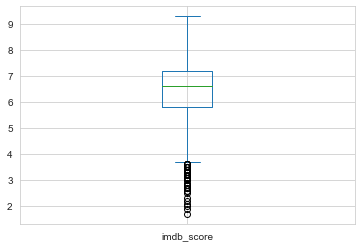

In [17]:
modified_dev_list['imdb_score'].plot(kind = 'box')

Text(0, 0.5, 'count')

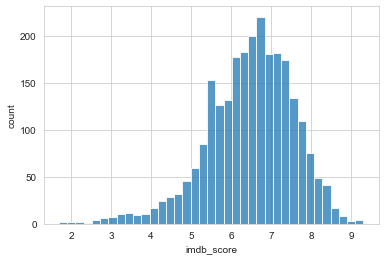

In [18]:
sns.histplot(modified_dev_list['imdb_score'])
plt.ylabel("count")

In [19]:
modified_dev_list['imdb_score'].describe()

count    2521.000000
mean        6.469695
std         1.090097
min         1.700000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

The boxplot is negatively skewed, we can use the value of the mean as a reasonable threshold as this covers a significant segment of the data.

Examining the box plot of the modified list, we can use the mean value to arrive at a reasonable threshold to filter suitable actors, directors, and genres for the production of our next movie. 

We exclude directors and movies with a score lower than the MEAN which is approximately 6.5

In [20]:

#filtere dev_list to imdb_score greater than 6.5
imdb_above_6_5 = modified_dev_list[modified_dev_list['imdb_score'] > 6.5]
imdb_score = imdb_above_6_5[['director_name','actor_2_name','actor_3_name','imdb_score','genres', 'gross', 'movie_title']]

#imdb_score.sort_values('count')
director_movies =imdb_score.loc[:,['director_name','movie_title']].groupby('director_name')

#make a new dataframe indexed by director which stores director and counts of movie titles
movie_counts=director_movies.count().reset_index('director_name')

#change column name to reduce confusion
movie_counts.columns = ['director_name','number of movies']

#sort by appropriate column
movie_counts = movie_counts.sort_values('number of movies', ascending=False)

#put into object containing the top director by name
movie_x_dir = movie_counts[0:10]['director_name']

#take a look at the top of the sorted object with name and number of movies 
movie_counts[0:10]

,director_name,number of movies
475,Martin Scorsese,11
802,Woody Allen,11
734,Steven Spielberg,9
595,Peter Jackson,8
641,Ridley Scott,8
116,Clint Eastwood,7
733,Steven Soderbergh,7
681,Sam Mendes,6
723,Stephen Frears,6
661,Robert Zemeckis,6


The above list shows the list of recommended directors for the next movie. These are directors with a number of movies with an IMDB score greater than 6.5

In [21]:
%pip install nltk

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [27]:
#Examining the predominant genres in top grossing movies
top_grossing = imdb_above_6_5.sort_values(by = 'gross', ascending = False)

#Converts Pd.series to list
rec_genres = list(top_grossing['genres'])
new_rec_genres = []

#Splits element into individual genre
for element in rec_genres:
    new = element.split('|')
    new_rec_genres += new 
new_rec_genres

#Computes frequency of genres from list
from nltk.probability import FreqDist

genre_distribution = FreqDist(new_rec_genres)
genre_series = pd.Series(genre_distribution)

genre_df = genre_series.to_frame().reset_index()
genre_df.columns = ['Genre', 'Count']

#Sort and view values 
genre_df.sort_values(by= ["Count"], ascending= False)

,Genre,Count
0,Drama,843
7,Comedy,371
5,Thriller,316
1,Romance,278
3,Adventure,247
2,Action,243
13,Crime,243
4,Sci-Fi,154
9,Fantasy,142
10,Mystery,142


From above, the predominant genres in the top grossing movies are shown above. It can be seen that Drama occured the most - 820 times, followed by Comedy which occured 377 times. Genres such as Thriller,Romance,Adventure,Action,Crime all have close numbers. 

Since the aim is to increase our chances of a top grossing movie, I'd advice a combination of the top grossing genres Drama and Comedy in addition to one of the rest,Adventure,Thriller,Drama, Comedy,Family,Fantasy, Family

Hypotheses that been have designed relating to the overall aim of this analysis

- There's no correlation between the budget of a movie and gross value of sales

- There's a relationship between the imdb_score of a movie and the gross value of sales.

This is to confirm the relationship between the imdb_score of a movie and the gross value of sale. i.e If our movie has a high imdb_score, does this mean that the we should expect a gross value sale for our movie?

Our hypothesis is that the imdb_score of a movie and the gross value of sales are related, which means if a movie has a high imdb_score, we should expect a greater than average gross sales. To confirm this, we use a method similar to the one above
.We perform both a pearson's and spearman's test on the data and compare the p_value obtained to the standard of 0.05.

In [ ]:
pearson_corr_1, pearson_p_value_1 = scipy.stats.pearsonr(new_test_list_df['gross'], new_test_list_df['imdb_score'])
spearman_corr_1, spearman_p_value_1 = scipy.stats.spearmanr(new_test_list_df['gross'], new_test_list_df['imdb_score'])

print(f"The pearson correlation coefficient between the gross and imdb_score is {pearson_corr_1} while the p_value is {pearson_p_value_1}")
print(f"The spearman correlation coefficient between the gross and imdb_score is {spearman_corr_1} while the p_value is {spearman_p_value_1}")


The pearson correlation coefficient between the gross and budget is 0.22197778961680523 while the p_value is 1.07445058418354e-22
The spearman correlation coefficient between the gross and budget is 0.13920887262093437 while the p_value is 1.0494853438658203e-09


From the scientific calculations above, it can be seen that the p_value of both the pearson and spearman's test, corresponding to 1.07 x 10^-22 and 1.045 x 10^-9 are both less than 0.05. Thus we reject our null hypothesis, and conclude that the relationship between the imdb_score of a movie and the gross value of sales is statistically significant.

This means that if our movie has a high imdb_score, we should expect a corresponding increase in sales.

Movies in the 'PG-13' content rating record the highest average sales per movie.

The third trend noticed in our dev set is that movies in the PG-13 content rating category record the highest average sales per movie. By confirming this hypothesis, we can make
an informed decision on the category to aim our next movie at, this can help inform ideas on movie plots.

To confirm this hypothesis, we perform a T-test on the test_data. Comparing the PG-13 content rating category with other categories.

In [ ]:
import numpy as np

#Calculating mean of each category
test_data_category_sum = dict(new_test_list_df.groupby('content_rating')['gross'].sum())

test_data_category_count = dict(new_test_list_df.groupby('content_rating')['gross'].count())

mean = {}

for a,b,c in zip(test_data_category_sum.keys(), test_data_category_sum.values(), test_data_category_count.values()):
    mean[a] = b/c

mean

{'Approved': 46613440.625,
 'G': 86604731.46666667,
 'GP': 43800000.0,
 'M': 62554450.0,
 'NC-17': 658644.3333333334,
 'Not Rated': 3777736.388888889,
 'PG': 80144358.89438944,
 'PG-13': 71571071.97916667,
 'Passed': 8000000.0,
 'R': 33707142.18682635,
 'Unrated': 961144.2727272727,
 'X': 19775845.333333332}

Actionable recommendations based on the analyses you have conducted.

Based on our analysis above, it can be seen that the performance the next movie doesn't entirely depend on how large our budget is. With a limited budget of 1.5million, we can optimize the spending of this budget by closely examining the genres,directors and actors involved.

- Genres such as Action, Adventure, Fantasy, Sci-Fi have been seen to amass a lot of sales. A mixture of genres can be appealing to wider segments resulting in more sales. Regarding the country of production, movies from the USA have also been seen to amass a lot of sales.

- The presence of directors such as 
Martin Scorses, 
Steven Spielberg, 
Woody Allen, 
Ridley Scott	
Peter Jackson	
Steven Soderbergh
Ron Howard	
Yimou Zhang	
Spike Lee	
Stephen Frears	 have been associated with higher sales of the movie.

- Since a high percentage of sales grouped by content rating comes from the PG-13, PG,R and G. It is advised that the content rating of our next movie should be within these categories to increase the probabilities reaching our gross projections.